<H2> Python Interview Test Practice </H2>

This preparation exercise will have you use the **USA_cars_datasets.csv** file to reinforce your understanding of the following functions:

<ol> Boolean Filtering </ol>
<ol> GROUP BY / Average Functions in Python </ol>
<ol> Matplotlib </ol>

Once you complete the exercise, you can use the **Answer key** file to check your answers. If you get stuck, please reach out to your mentor or reach out and ask the question on #Slack!

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

df_cars= pd.read_csv("USA_cars_datasets.csv")
print(df_cars)

        price      brand    model  year   title_status  mileage   color  \
0      6300.0     toyota  cruiser  2008  clean vehicle   274117   black   
1      2899.0       ford       se  2011  clean vehicle   190552  silver   
2      5350.0      dodge      mpv  2018  clean vehicle    39590  silver   
3     25000.0       ford     door  2014  clean vehicle    64146    blue   
4     27700.0  chevrolet     1500  2018  clean vehicle     6654     red   
...       ...        ...      ...   ...            ...      ...     ...   
2494   7800.0     nissan    versa  2019  clean vehicle    23609     red   
2495   9200.0     nissan    versa  2018  clean vehicle    34553  silver   
2496   9200.0     nissan    versa  2018  clean vehicle    31594  silver   
2497   9200.0     nissan    versa  2018  clean vehicle    32557   black   
2498   9200.0     nissan    versa  2018  clean vehicle    31371  silver   

           state country  
0     new jersey     usa  
1      tennessee     usa  
2        georgia  

<b>Q1. In the US, what is the average price per car in each state? Order this in descending order.<b>

In [143]:
df_cars_usa= df_cars[df_cars["country"]==" usa"]

avergae_price= df_cars_usa["price"].mean()
prices= round(avergae_price,2)
print("the average price is " + str(prices))



USA= df_cars.loc[(df_cars['country']==' usa')].groupby(by="state").price.mean().sort_values(ascending= False)
print(USA)
                         

the average price is 18735.12
state
kentucky          44969.444444
new mexico        27375.000000
washington        26771.428571
illinois          26715.707965
michigan          23899.822485
alabama           23872.058824
nevada            23653.529412
pennsylvania      22810.210702
indiana           21391.428571
nebraska          21350.000000
mississippi       21148.333333
wisconsin         21103.191489
virginia          20041.000000
oklahoma          19839.084507
minnesota         18207.352941
new york          17850.706897
california        17836.710526
rhode island      17808.000000
massachusetts     17650.555556
ohio              17460.967742
south carolina    17270.703125
new hampshire     16757.500000
north carolina    16485.273973
tennessee         16259.576923
new jersey        16209.712644
missouri          16192.391304
louisiana         16181.181818
georgia           16050.313725
kansas            15500.000000
west virginia     15447.619048
florida           15075.630081
con

<b> Q2. What is the average price per car brand within the US? Plot this out in a Bar Plot in descending order.</b>

<AxesSubplot:xlabel='brand'>

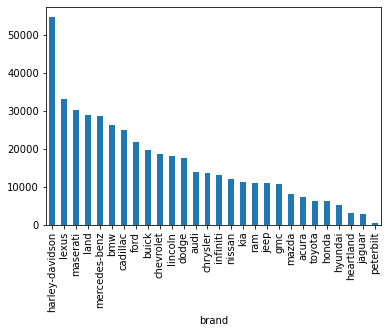

In [150]:
'''df_cars_sorted= df_cars_usa.sort_values(by ='price', ascending= False)

x= df_cars_sorted["brand"]
y= df_cars_sorted["price"]

plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()
'''

df_cars.loc[df_cars["country"]==" usa"].groupby(by="brand").price.mean().sort_values(ascending= False).plot(kind="bar")




<b> Q3. In Canada, what is the most popular brand and color of the cars that are listed for sale? </b>

In [169]:

canada_brand= df_cars[["country", "brand"]].loc[(df_cars["country"]==" canada")].groupby(by = "brand").count()
print(canada_brand)
print("the most popular brand is dodge")

canada_color= df_cars[["country", "color"]].loc[(df_cars["country"]==" canada")].groupby(by="color").count()
print(canada_color)

print("\n the most popular color is white")


           country
brand             
chevrolet        1
dodge            6
the most popular brand is dodge
        country
color          
orange        1
red           1
white         5

 the most popular color is white


<b> Q4. Is there a substantial price difference between the average price for a clean car in the US vs. a clean car in Canada? If yes, what is the difference? </b> 

In [175]:
df_clean_car_canada= df_cars_canada[df_cars_canada["title_status"]=="clean vehicle"]
df_clean_car_usa= df_cars_usa[df_cars_usa["title_status"]=="clean vehicle"]

average_price_clean_usa= int(df_clean_car_usa["price"].mean())
average_price_clean_canada =int(df_clean_car_canada["price"].mean())
print("the average price Usa is " + str(average_price_clean_usa))
print(" the vaerage price canada is " + str(average_price_clean_canada))


difference = int(verage_price_clean_canada -average_price_clean_usa)
print("the difference is $" + str(difference))

the average price Usa is 19883
 the vaerage price canada is 30357
the difference is $10474


<b> Q5. In the US / Canada - which car, brand and model is sold at the highest average price? </b>

In [192]:
all_cars_brand_model= df_cars.groupby(["model", "brand"])
highest_price= all_cars_brand_model["price"].max()

print(highest_price. head(1))

highest_usa= df_cars[["country", "brand", "model", "price"]].loc[(df_cars["country"] == " usa")].groupby([ "country", "brand", "model"] ).price.mean().sort_values(ascending=False)
print(highest_usa.head(1))
print("thee most expensive in us is mercedes-benz  sl-class  at  $84900")

highest_canada = df_cars[["country", "brand", "model", "price"]].loc[(df_cars["country"]==" canada")].groupby(["country", "brand", "model"]).price.mean().sort_values(ascending= False)
print(highest_canada.head(1))
print("the most expensive in candada is chevrolet  1500   at  3$3000")


model  brand    
1500   chevrolet    46800.0
Name: price, dtype: float64
country  brand          model   
 usa     mercedes-benz  sl-class    84900.0
Name: price, dtype: float64
thee most expensive in us is mercedes-benz  sl-class  at  $84900
country  brand      model
 canada  chevrolet  1500     33000.0
Name: price, dtype: float64
the most expensive in candada is chevrolet  1500   at  3$3000
